In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nltk
import wordcloud
%matplotlib inline
plt.style.use("ggplot")
data = pd.read_csv("globalterrorismdb_0718dist.csv",encoding='ISO-8859-1')

C:\Users\bagat\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We changed the column names to make it easier to review

In [2]:
data.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country',
                       'region_txt':'Region','attacktype1_txt':'AttackType','target1':'Target',
                       'nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group',
                       'targtype1_txt':'Target_type','weaptype1_txt':'Weapon_type',
                       'motive':'Motive'},inplace=True)
data=data[['Year','Month','Day','Country','Region','city'
               ,'AttackType','Killed','Wounded','Target','Group','Target_type',
               'Weapon_type','Motive']]

data['Casualty'] = data['Killed'] + data['Wounded']

In [3]:
turkey_data=data[data["Country"]=="Turkey"]
turkey_data.reset_index(inplace=True)
turkey_data.tail()


,index,Year,Month,Day,Country,Region,city,AttackType,Killed,Wounded,Target,Group,Target_type,Weapon_type,Motive,Casualty
4287,181486,2017,12,23,Turkey,Middle East & North Africa,Unknown,Armed Assault,4.0,0.0,Personnel,Kurdistan Workers' Party (PKK),Military,Firearms,NaN,4.0
4288,181529,2017,12,25,Turkey,Middle East & North Africa,Semdinli district,Unknown,2.0,1.0,Soldiers,Kurdistan Workers' Party (PKK),Military,Unknown,NaN,3.0
4289,181607,2017,12,28,Turkey,Middle East & North Africa,Adana,Bombing/Explosion,0.0,0.0,Station,Unknown,Police,Explosives,NaN,0.0
4290,181610,2017,12,28,Turkey,Middle East & North Africa,Cukurca district,Bombing/Explosion,0.0,3.0,Zer Tepe Base,Kurdistan Workers' Party (PKK),Military,Explosives,NaN,3.0
4291,181611,2017,12,28,Turkey,Middle East & North Africa,Cukurca district,Bombing/Explosion,0.0,3.0,Kirmizikaya Base,Kurdistan Workers' Party (PKK),Military,Explosives,NaN,3.0


# Wordcloud

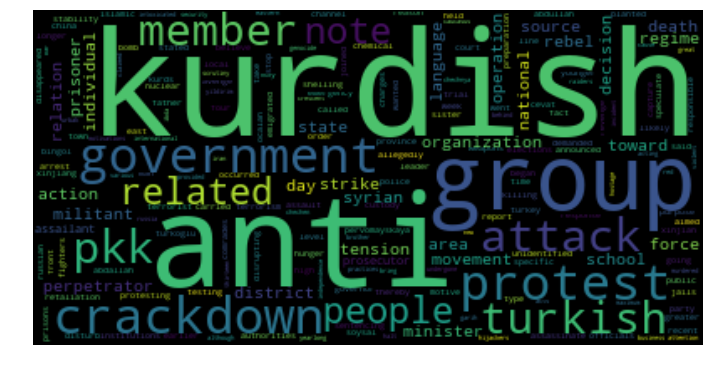

In [4]:
text = turkey_data["Motive"].dropna().str.lower().str.replace(r'\|', ' ').str.cat(sep=' ')
words=nltk.tokenize.word_tokenize(text)
stopwords = nltk.corpus.stopwords.words('english')
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords and w!="unknown") 
wordcloud = wordcloud.WordCloud().generate(" ".join(words_except_stop_dist))
fig = plt.subplots(figsize=(12,8))
plt.imshow(wordcloud,interpolation="bilinear")
plt.axis("off")
plt.show()

# Number of Terorist Activities Each Year in Turkey

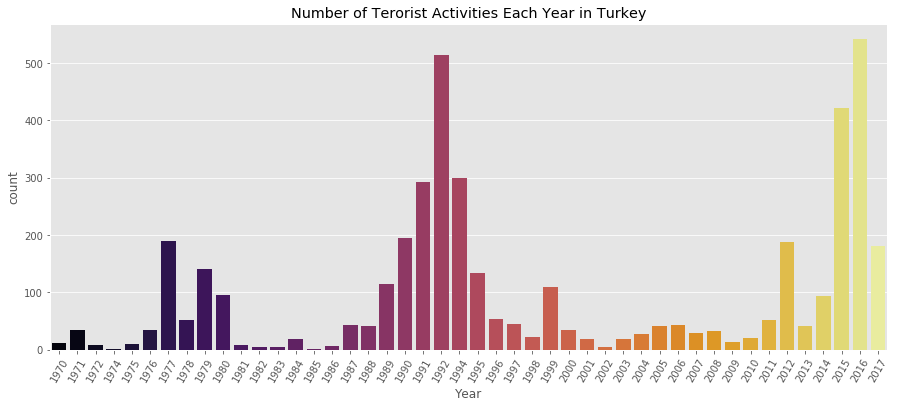

In [5]:
plt.subplots(figsize=(15,6))
sns.countplot("Year",data=turkey_data,palette="inferno")
plt.xticks(rotation=60)
plt.title("Number of Terorist Activities Each Year in Turkey")
plt.show()

# Total Terrorist Activity by Cities

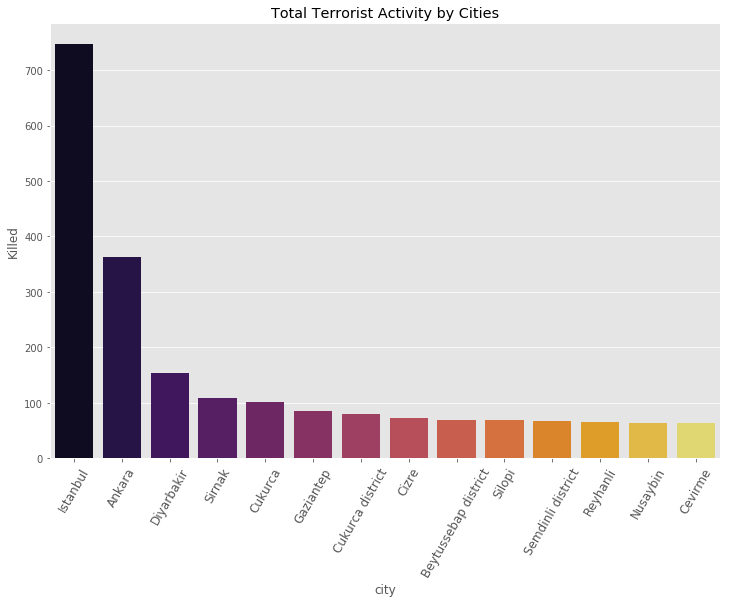

In [6]:
most_citites=turkey_data.groupby("city")["Killed"].sum().to_frame()
most_citites=most_citites.sort_values("Killed",ascending=False)[1:15]
plt.subplots(figsize=(12,8))
sns.barplot(most_citites.index,most_citites.Killed,palette="inferno")
plt.title("Total Terrorist Activity by Cities")
plt.xticks(rotation=60)
plt.xticks(fontsize=12)
plt.show()

In [17]:
print("City with highest terrorist atack in Turkey :",turkey_data["city"].value_counts().index[0],"Total people died :",
     turkey_data[turkey_data["city"]=="Istanbul"]["Killed"].sum(),"Total casualites :"
      ,turkey_data[turkey_data["city"]=="Istanbul"]["Casualty"].sum())

City with highest terrorist atack in Turkey : Istanbul Total people died : 747.0 Total casualites : 3346.0


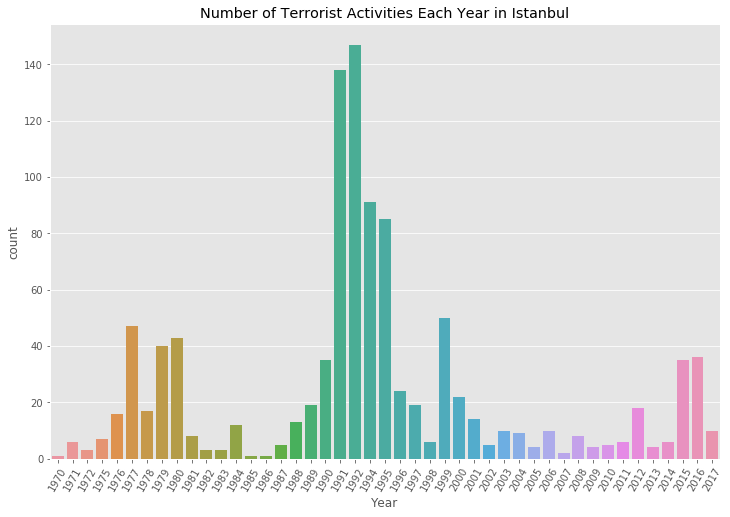

In [21]:
istanbul_data = turkey_data[turkey_data["city"]=="Istanbul"]

plt.subplots(figsize=(12,8))
sns.countplot("Year",data=istanbul_data)
plt.xticks(rotation=60)
plt.title("Number of Terrorist Activities Each Year in Istanbul")
plt.show()

# Attack Type

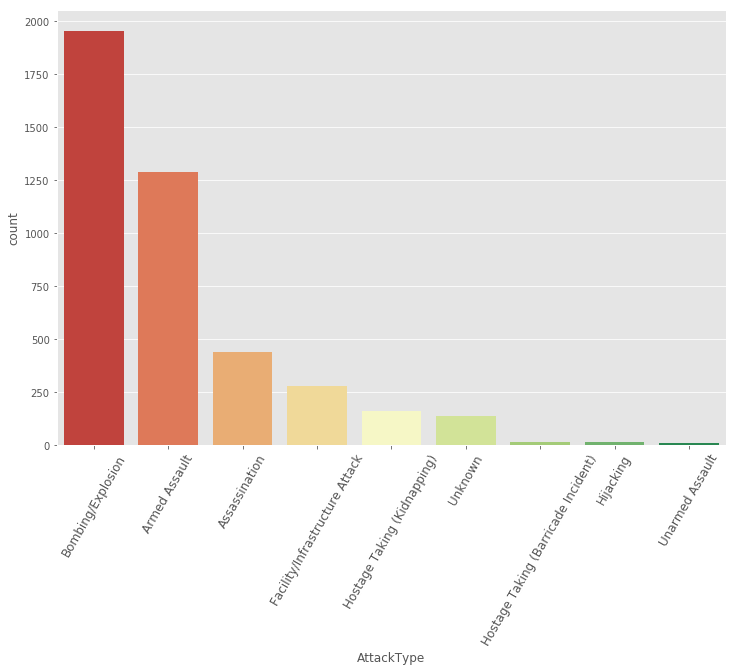

In [9]:
plt.subplots(figsize=(12,8))
sns.countplot("AttackType",data=turkey_data,palette="RdYlGn",order=turkey_data.AttackType.value_counts().index)
plt.xticks(rotation=60)
plt.xticks(fontsize=12)
plt.show()

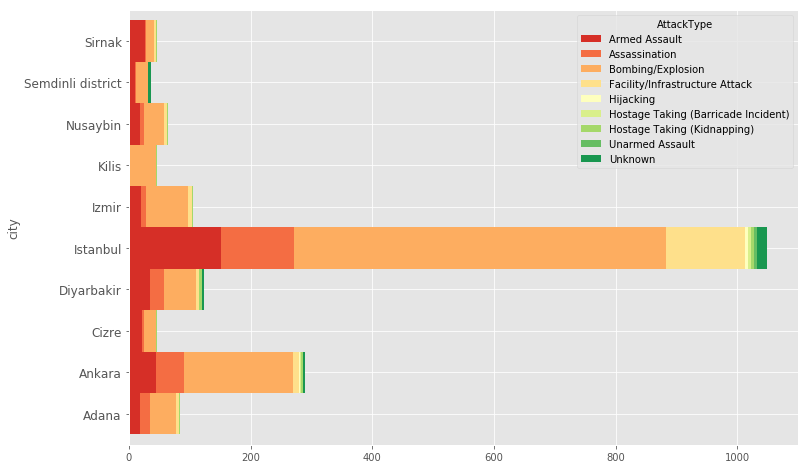

In [10]:
city = turkey_data["city"].value_counts().drop("Unknown")[0:10].index
city = turkey_data[turkey_data["city"].isin(city)]
pd.crosstab(city.city,city.AttackType).plot.barh(stacked=True,width=1,color=sns.color_palette("RdYlGn",9))
fig = plt.gcf()
fig.set_size_inches(12,8)
plt.yticks(fontsize=12)
plt.show()

# Target type

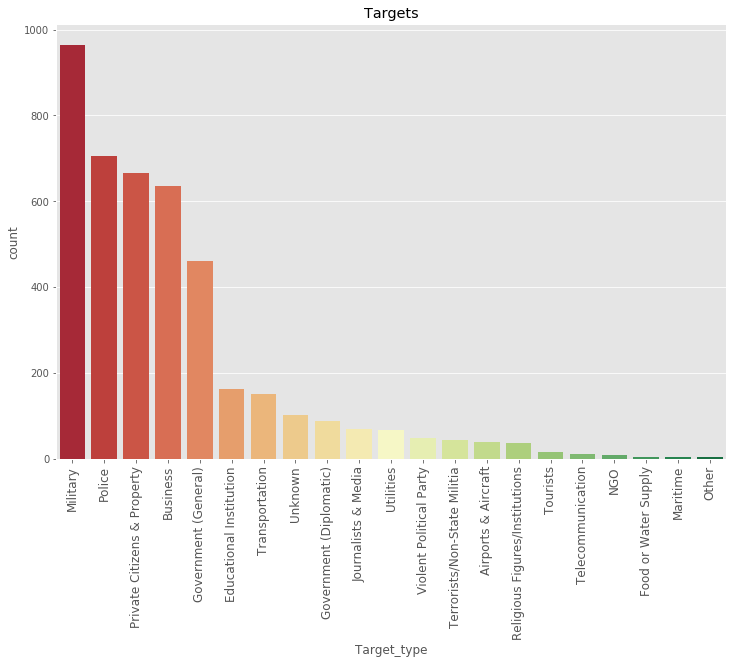

In [11]:
plt.subplots(figsize=(12,8))
sns.countplot("Target_type",data=turkey_data,palette="RdYlGn",order=turkey_data.Target_type.value_counts().index)
plt.title("Targets")
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.show()

# The most notorious groups

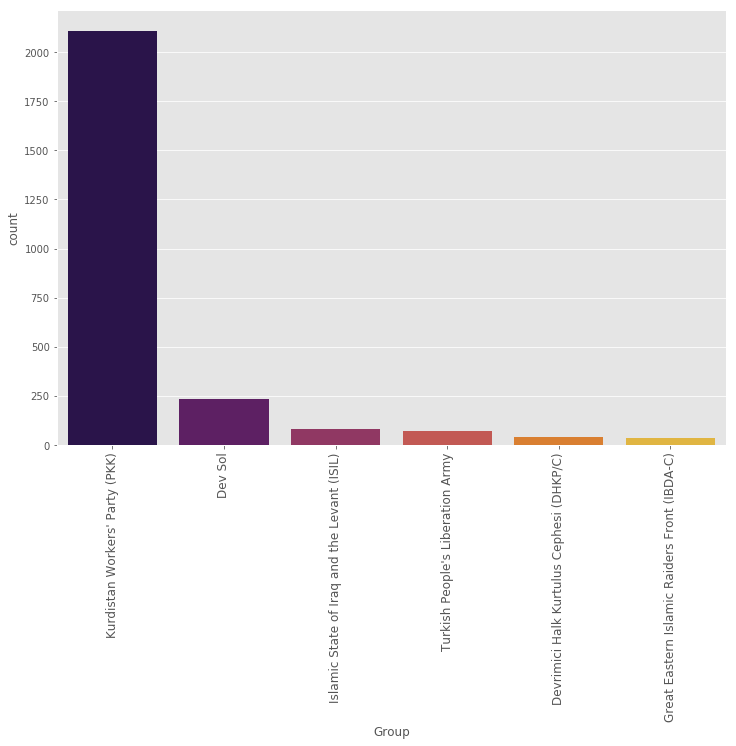

In [12]:
groups = turkey_data["Group"].value_counts().drop("Unknown").index[:6]
groups = turkey_data[turkey_data["Group"].isin(groups)]
plt.subplots(figsize=(12,8))
sns.countplot("Group",data=groups,order=groups.Group.value_counts().index,palette="inferno")
plt.xticks(rotation=90)
plt.xticks(fontsize=12)
plt.show()

# Most attacked cities by pkk


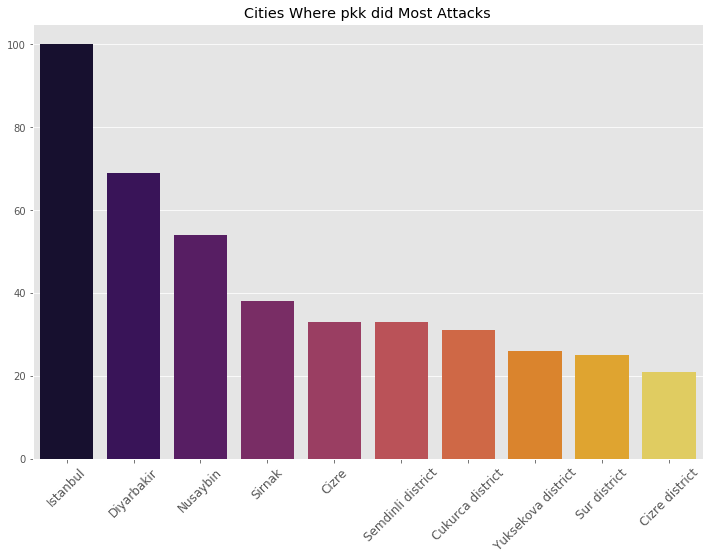

In [13]:
pkk = turkey_data[turkey_data.Group == "Kurdistan Workers' Party (PKK)"]
plt.subplots(figsize=(12,8))
attack=pkk.city.value_counts().drop("Unknown")[:10]
sns.barplot(attack.index,attack.values,palette="inferno")
plt.title("Cities Where pkk did Most Attacks")
plt.xticks(rotation=45)
plt.xticks(fontsize=12)
plt.show()

# Used weapon types

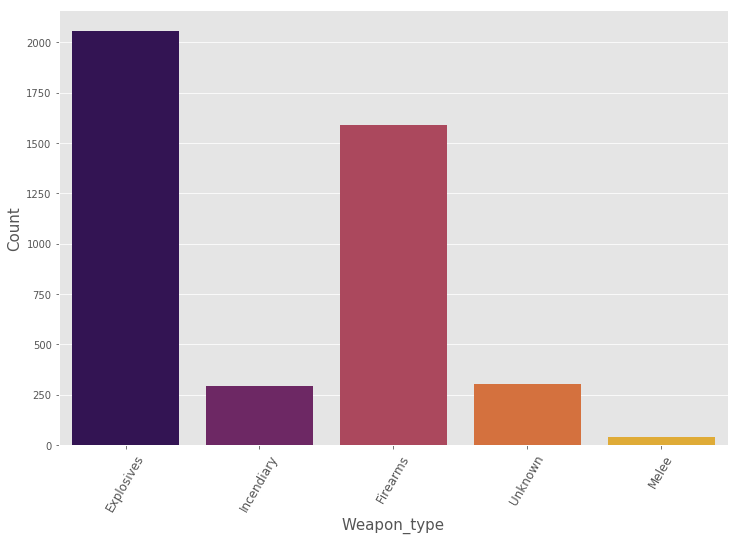

In [14]:
weapon_type= turkey_data["Weapon_type"].value_counts().index[:5]
weapon_type = turkey_data[turkey_data["Weapon_type"].isin(weapon_type)]
plt.subplots(figsize=(12,8))
sns.countplot("Weapon_type",data=weapon_type,palette="inferno")
plt.xticks(fontsize=12)
plt.xticks(rotation=60)
plt.xlabel("Weapon_type", fontsize=15)
plt.ylabel("Count",fontsize=15)
plt.show()